# Exploratory Data Analysis (EDA)

## Table of Contents
1. [Dataset Overview](#dataset-overview)
2. [Handling Missing Values](#handling-missing-values)
3. [Feature Distributions](#feature-distributions)
4. [Possible Biases](#possible-biases)
5. [Correlations](#correlations)


. [Correlations](#correlations)


In [27]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Dataset Overview

[Provide a high-level overview of the dataset. This should include the source of the dataset, the number of samples, the number of features, and example showing the structure of the dataset.]


In [28]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt

drive.mount('/content/drive')

path = "/content/drive/MyDrive/Forcasting based on Energy Charts datasets/Energy_Charts_2025_to_2024.csv"


# Load the data
# Replace 'your_dataset.csv' with the path to your actual dataset
df = pd.read_csv(path, low_memory=False)

# Number of samples
num_samples = df.shape[0]

# Number of features
num_features = df.shape[1]

# Display these dataset characteristics
print(f"Number of samples: {num_samples}")
print(f"Number of features: {num_features}")

# Display the first few rows of the dataframe to show the structure
print("Example data:")
print(df.head())



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Number of samples: 70176
Number of features: 24
Example data:
             Date (GMT+1)  Hydro pumped storage consumption  \
0  2025-01-01T00:00+01:00                            -720.5   
1  2025-01-01T00:15+01:00                            -828.9   
2  2025-01-01T00:30+01:00                            -940.4   
3  2025-01-01T00:45+01:00                            -979.7   
4  2025-01-01T01:00+01:00                            -658.1   

   Cross border electricity trading  Nuclear  Hydro Run-of-River  Biomass  \
0                          -11166.1      NaN              1725.3   4075.3   
1                          -11166.1      NaN              1740.2   3943.3   
2                          -10936.5      NaN              1739.8   3882.6   
3                          -10936.5      NaN              1770.8   3854.1   
4                          -12252.4      NaN 

## Handling Missing Values

[Identify any missing values in the dataset, and describe your approach to handle them if there are any. If there are no missing values simply indicate that there are none.]


In [29]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values


,0
Date (GMT+1),0
Hydro pumped storage consumption,0
Cross border electricity trading,0
Nuclear,70176
Hydro Run-of-River,0
Biomass,0
Fossil brown coal / lignite,0
Fossil hard coal,0
Fossil oil,0
Fossil coal-derived gas,0


In [30]:
# Handling missing values
# Example: Replacing NaN values with the mean value of the column
# df.fillna(df.mean(), inplace=True)
df = df.fillna(0)
df = df.loc[df['Date (GMT+1)'].notna()]


In [31]:
df = df.set_index(['Date (GMT+1)'])

In [32]:
# Check for missing values again
missing_values = df.isnull().sum()
missing_values

,0
Hydro pumped storage consumption,0
Cross border electricity trading,0
Nuclear,0
Hydro Run-of-River,0
Biomass,0
Fossil brown coal / lignite,0
Fossil hard coal,0
Fossil oil,0
Fossil coal-derived gas,0
Fossil gas,0


## Feature Distributions

[Plot the distribution of various features and target variables. Comment on the skewness, outliers, or any other observations.]


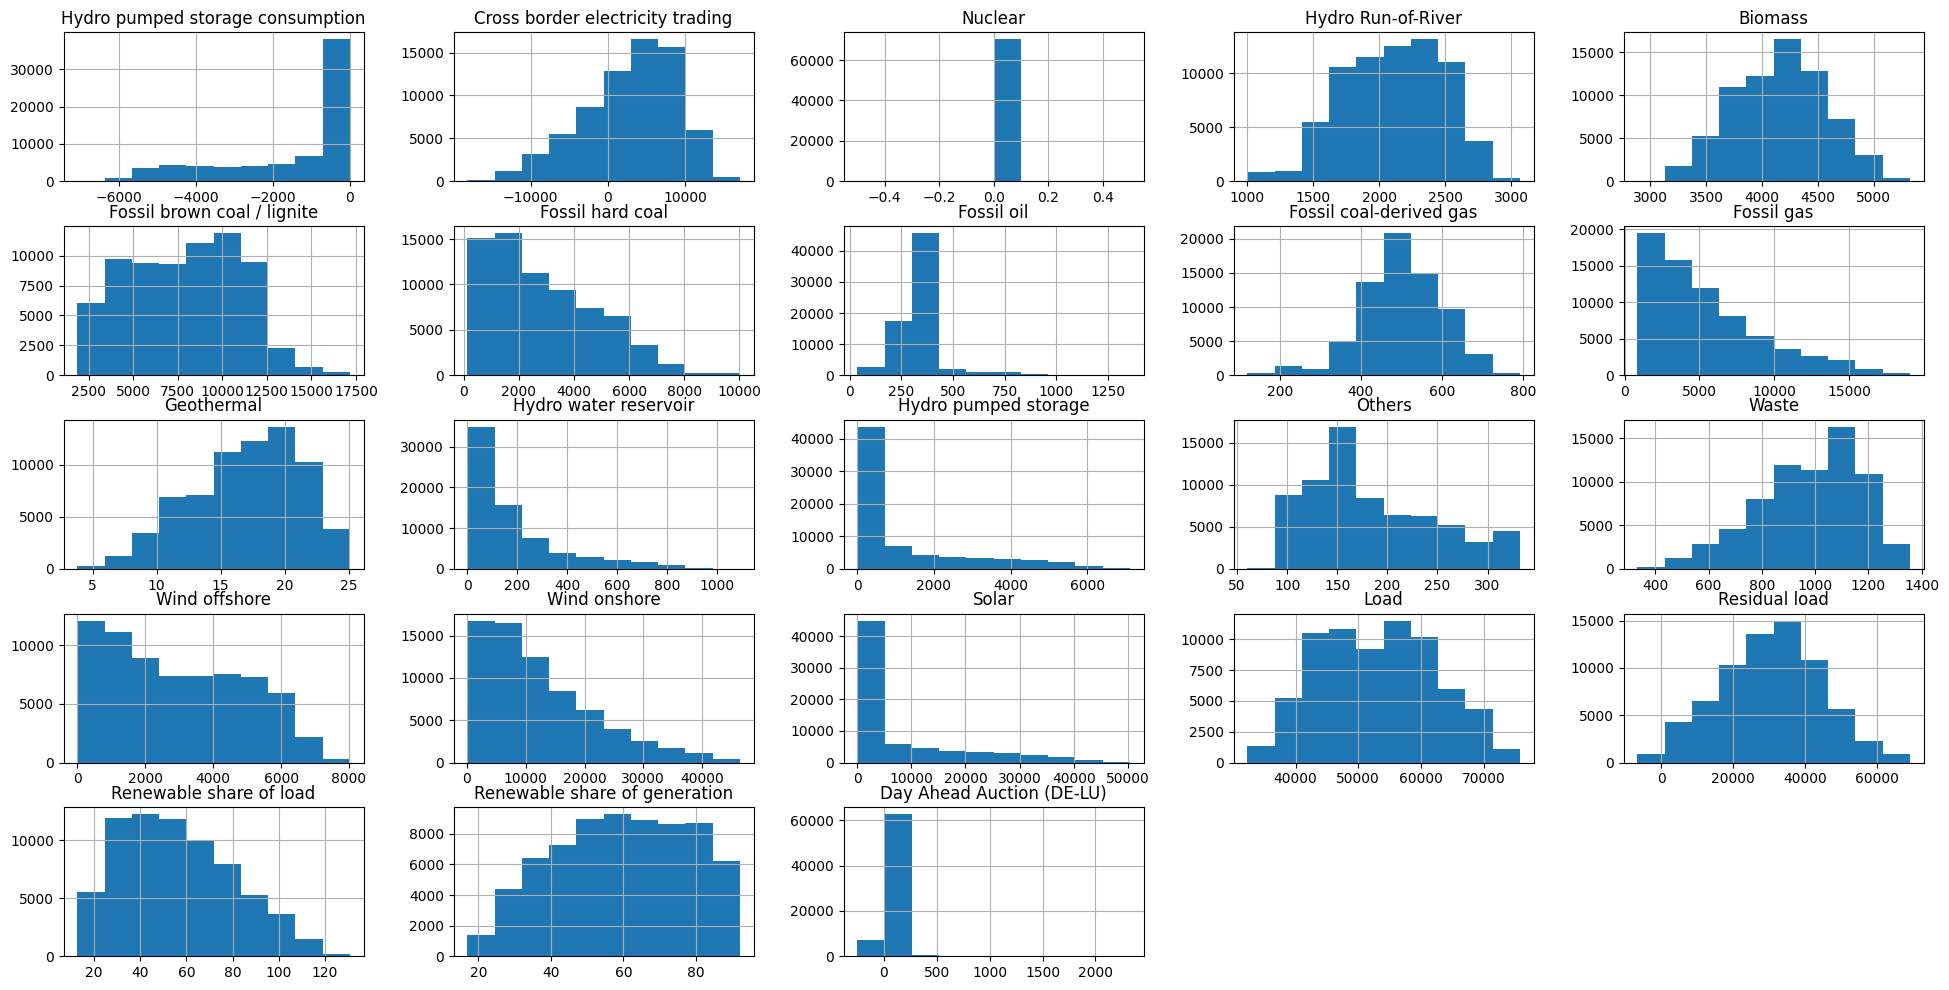

In [33]:
# Example: Plotting histograms of all numerical features
df.hist(figsize=(24, 12))
plt.show()


## Possible Biases

[Investigate the dataset for any biases that could affect the model’s performance and fairness (e.g., class imbalance, historical biases).]


In [34]:
# Example: Checking for class imbalance in a classification problem
# sns.countplot(x='target_variable', data=df)

# Your code to investigate possible biases goes here


## Correlations

[Explore correlations between features and the target variable, as well as among features themselves.]


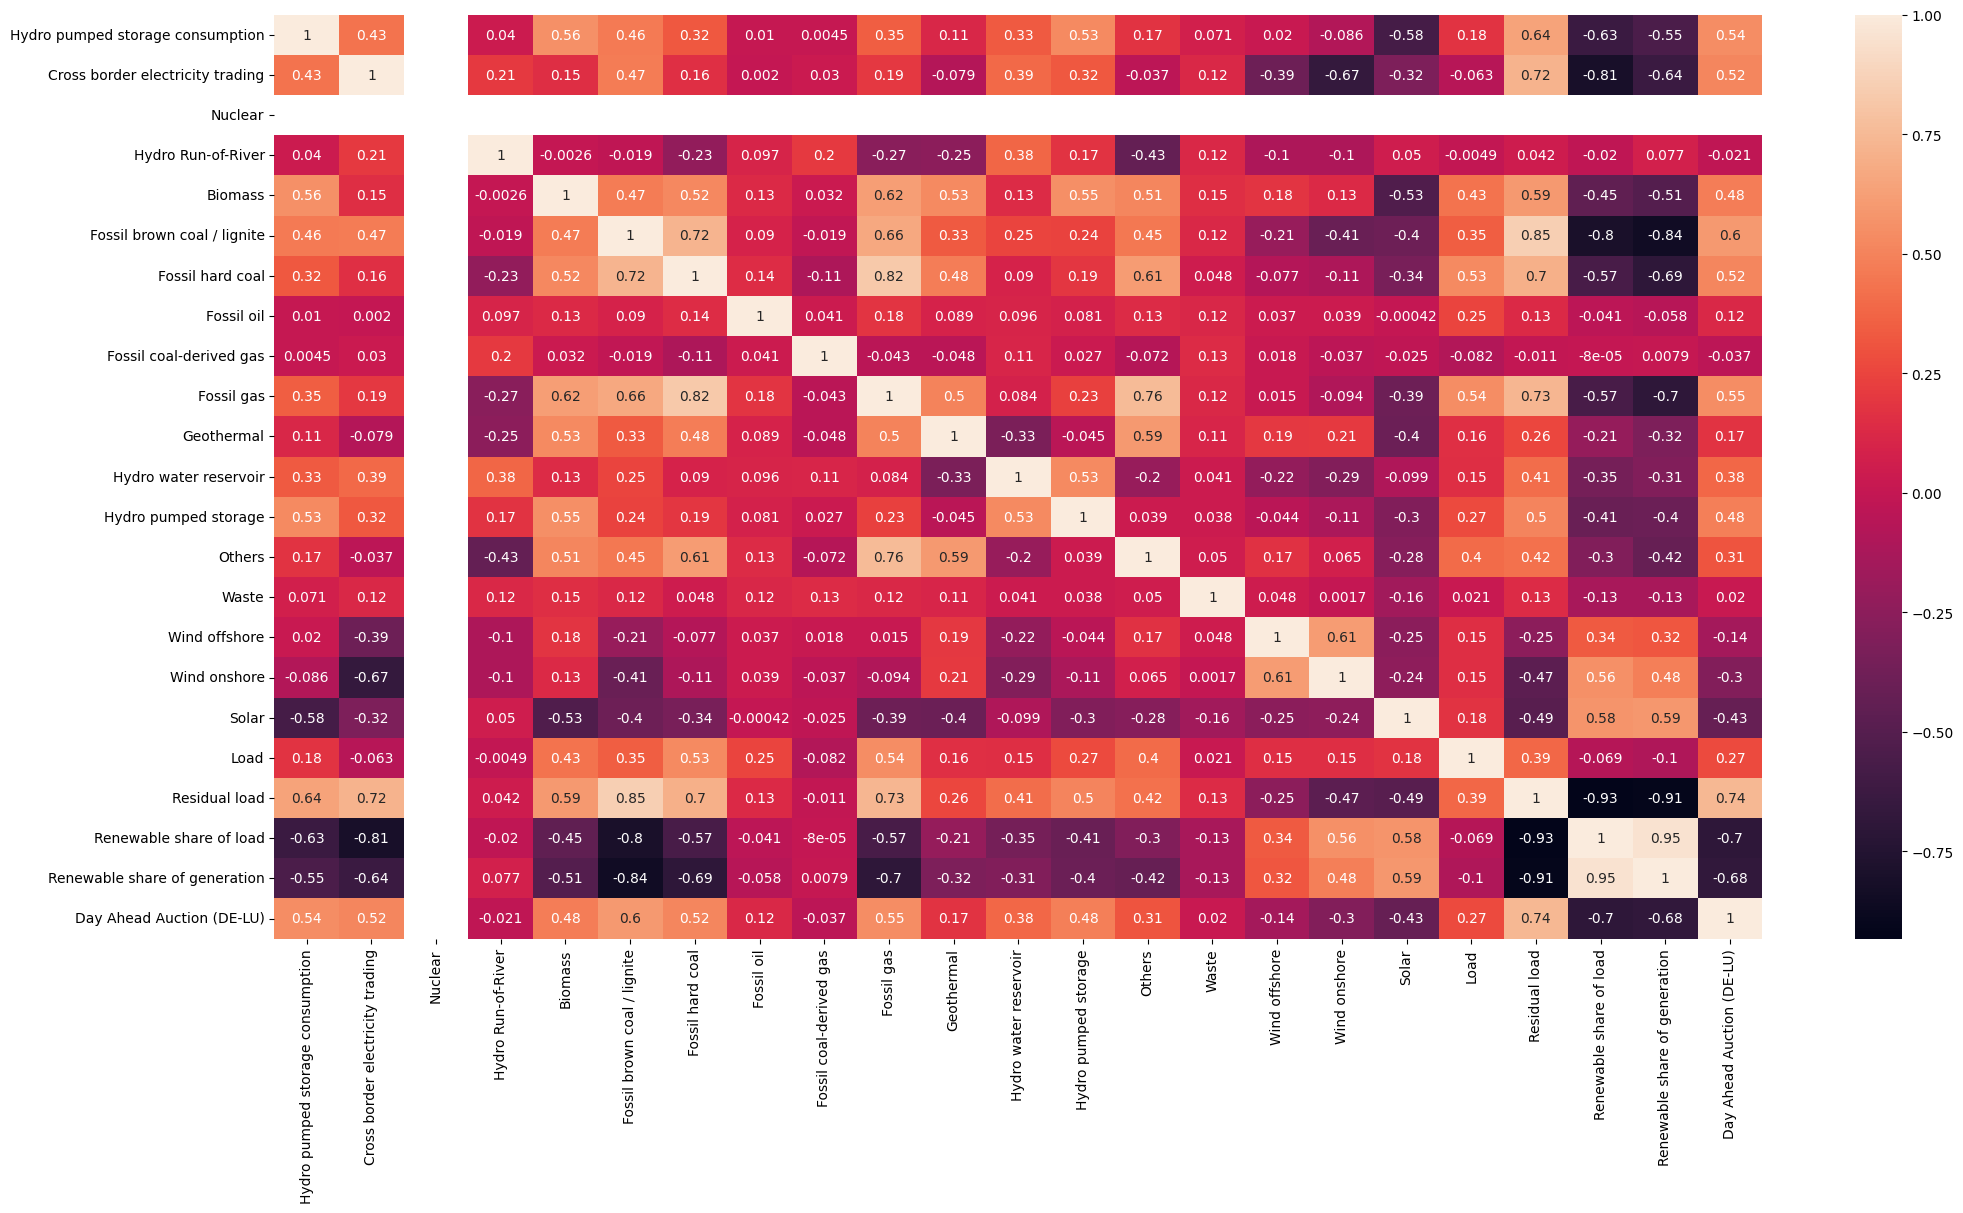

In [35]:
# Example: Plotting a heatmap to show feature correlations

correlation_matrix = df.corr()
plt.figure(figsize=(24, 12))
sns.heatmap(correlation_matrix, annot=True)
plt.show()


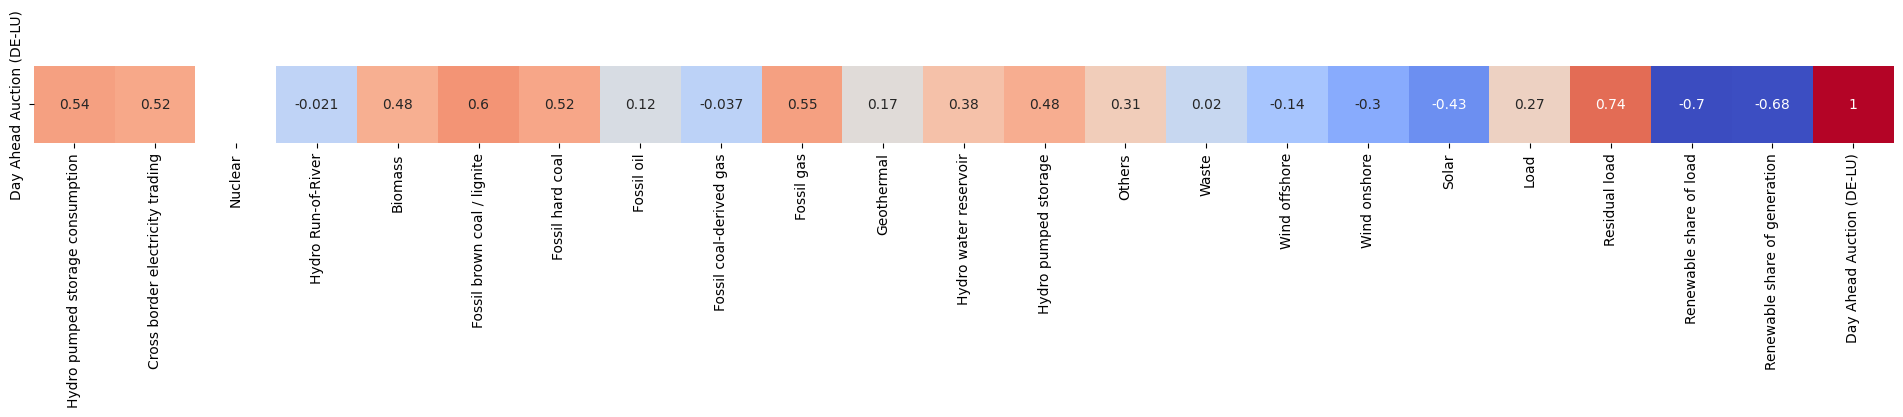

In [36]:
target = "Day Ahead Auction (DE-LU)" # deine Variable
plt.figure(figsize=(24, 1))
sns.heatmap( correlation_matrix[[target]].T, # nur die Spalte, transponiert zu einer Zeile
            annot=True, cmap="coolwarm", cbar=False )
plt.show()

In [37]:
target = "Day Ahead Auction (DE-LU)"

correlations = correlation_matrix[target].sort_values(ascending=False)
print(correlations)


Day Ahead Auction (DE-LU)           1.000000
Residual load                       0.742104
Fossil brown coal / lignite         0.596684
Fossil gas                          0.545497
Hydro pumped storage consumption    0.544739
Fossil hard coal                    0.516677
Cross border electricity trading    0.515919
Hydro pumped storage                0.484154
Biomass                             0.478509
Hydro water reservoir               0.381108
Others                              0.309137
Load                                0.274796
Geothermal                          0.174299
Fossil oil                          0.118479
Waste                               0.020347
Hydro Run-of-River                 -0.021132
Fossil coal-derived gas            -0.036501
Wind offshore                      -0.144816
Wind onshore                       -0.296296
Solar                              -0.425950
Renewable share of generation      -0.683314
Renewable share of load            -0.695510
Nuclear   